In [ ]:
install.packages("klaR")

In [8]:
library(klaR)

Carregando pacotes exigidos: MASS



In [3]:
ronfle <- read.table("ronfle.txt", header = TRUE)

head(ronfle)

summary(ronfle)

,age,poids,taille,alcool,sexe,ronfle,taba
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,47,71,158,0,H,N,O
2,56,58,164,7,H,O,N
3,46,116,208,3,H,N,O
4,70,96,186,3,H,N,O
5,51,91,195,2,H,O,O
6,46,98,188,0,F,N,N


      age            poids            taille          alcool     
 Min.   :23.00   Min.   : 42.00   Min.   :158.0   Min.   : 0.00  
 1st Qu.:43.00   1st Qu.: 77.00   1st Qu.:166.0   1st Qu.: 0.00  
 Median :52.00   Median : 95.00   Median :186.0   Median : 2.00  
 Mean   :52.27   Mean   : 90.41   Mean   :181.1   Mean   : 2.95  
 3rd Qu.:62.25   3rd Qu.:107.00   3rd Qu.:194.0   3rd Qu.: 4.25  
 Max.   :74.00   Max.   :120.00   Max.   :208.0   Max.   :15.00  
     sexe              ronfle              taba          
 Length:100         Length:100         Length:100        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.

100 observations of 6 variables in 2 classes; direction: both

stop criterion: improvement less than 5%.



Warning message in cv.rate(vars = c(model, tryvar), data = data, grouping = grouping, :
"error(s) in modeling/prediction step"
Warning message in cv.rate(vars = c(model, tryvar), data = data, grouping = grouping, :
"error(s) in modeling/prediction step"


correctness rate: 0.66;  in: "age";  variables (1): age 


Warning message in cv.rate(vars = c(model, tryvar), data = data, grouping = grouping, :
"error(s) in modeling/prediction step"
Warning message in cv.rate(vars = c(model, tryvar), data = data, grouping = grouping, :
"error(s) in modeling/prediction step"



 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.19 



resposta ~ age
<environment: 0x000001bc9db7d570>

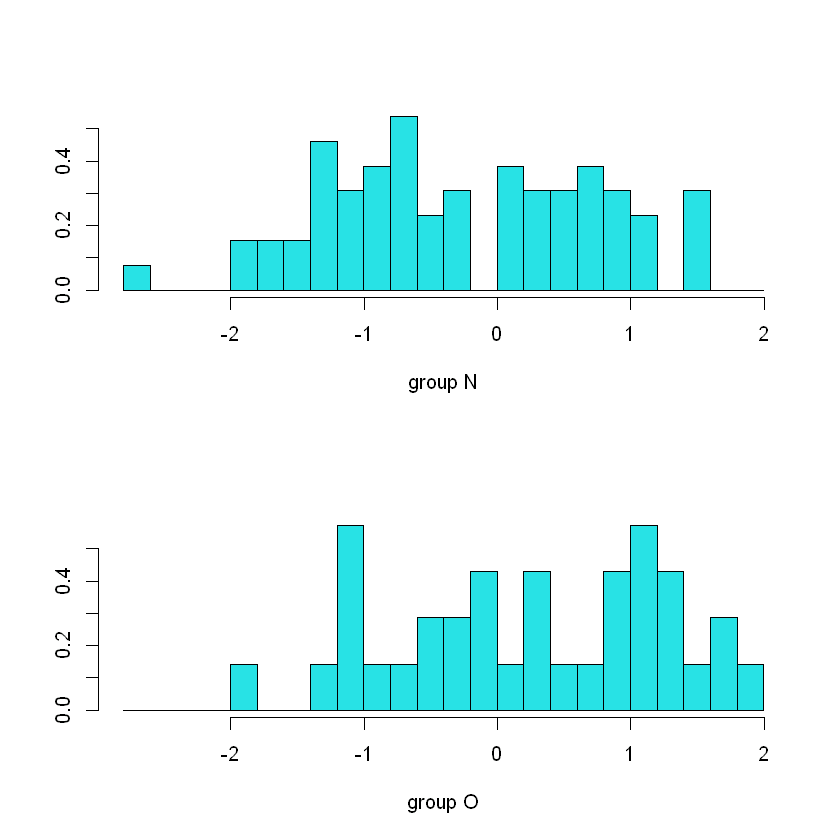

In [13]:
preditoras <- ronfle[, -6] # Todas as colunas exceto 'ronfle'
resposta <- ronfle$ronfle

modelo_step <- stepclass(
  preditoras,
  resposta,
  method = "lda",
  direction = "both"
)

formula_lda <- modelo_step$formula
formula_lda
modelo_lda <- lda(formula_lda, data = ronfle)
plot(modelo_lda)

In [12]:
predicoes <- predict(modelo_lda, ronfle)$class
confusao <- table(Predito = predicoes, Real = resposta)

taxa_acerto <- sum(diag(confusao)) / sum(confusao)
print(paste("Taxa de acerto:", round(taxa_acerto * 100, 2), "%"))

# Validação Cruzada
predicoes_cv <- lda(formula_lda, data = ronfle, CV = TRUE)$class
confusao_cv <- table(Predito = predicoes_cv, Real = resposta)
taxa_acerto_cv <- sum(diag(confusao_cv)) / sum(confusao_cv)
print(paste("Taxa de acerto com validação cruzada:", round(taxa_acerto_cv * 100, 2), "%"))

[1] "Taxa de acerto: 68 %"
[1] "Taxa de acerto com validação cruzada: 66 %"
